# Practica3
## Eduardo Leonel Sanchez Velasco
## NC: 420004035

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from random import randint as rand
from skimage import io
from math import ceil, floor
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def plot_img(img,title,max = 0):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.subplot(1,2,1)
    plt.title(title+' '+name)
    if(max == 1):
        plt.imshow(image,vmax=255,vmin=0,cmap='gray')
    else:
        plt.imshow(image)
    plt.show()
    
def plot_img2(img,title,max, min):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.subplot(1,2,1)
    plt.title(title+' '+name)
    plt.imshow(image,vmax=max,vmin=min,cmap='gray')
    plt.show()
    
def saveImg(diccionario, tipo):
    for img in diccionario.keys():
        plt.imsave('resultados/{}_{}.jpg'.format(tipo,img),diccionario[img])

In [3]:
imagenes = {}
tf_imagenes = {}
ctf_imagenes = {}
magnitud_ctf = {}
fase_ctf = {}
amplitud_ctf = {}
inverse_amplitud_ctf = {}
inverse_fase_ctf = {}
magnitud_tf = {}
fase_tf = {}
amplitud_tf = {}
inverse_amplitud_tf = {}
inverse_fase_tf = {}
inverse_tf_img = {}
inverse_ctf_img = {}

In [4]:
rm=io.imread('imagenes/fourier_bw512.bmp')/255
imagenes['fourier_bw'] = rm
rm=io.imread('imagenes/ImagenEspectroF.png')/255
imagenes['Espectro_Fourier'] = rm
rm=io.imread('imagenes/saturn_bw.tif')/255
imagenes['Saturn_bw'] = rm

In [5]:
for img in imagenes:
    tf_imagenes[img] = np.fft.fft2(imagenes[img])

In [6]:
for img in imagenes:
    ctf_imagenes[img] =  np.fft.fftshift(tf_imagenes[img])

In [7]:
for img in imagenes:
    magnitud_ctf[img] = abs(ctf_imagenes[img])
for img in imagenes:
    magnitud_tf[img] = abs(tf_imagenes[img])

In [8]:
for img in imagenes:
    fase_ctf[img] = np.angle(ctf_imagenes[img])
for img in imagenes:
    fase_tf[img] = np.angle(tf_imagenes[img])

In [9]:
for img in imagenes:
    amplitud_ctf[img] = np.log1p(magnitud_ctf[img]) 
for img in imagenes:
    amplitud_tf[img] = np.log1p(magnitud_tf[img]) 

In [10]:
for img in imagenes:
    inverse_tf_img[img] = np.fft.ifft2(tf_imagenes[img])
    inverse_tf_img[img] = abs(inverse_tf_img[img])
    inverse_tf_img[img] = np.fft.ifftshift(inverse_tf_img[img])
    
for img in imagenes:
    inverse_ctf_img[img] = np.fft.ifft2(ctf_imagenes[img])
    inverse_ctf_img[img] = abs(inverse_ctf_img[img]) 
    
    

In [11]:
for img in imagenes:
    inverse_amplitud_ctf[img] = np.fft.ifft2(magnitud_ctf[img])
    inverse_amplitud_ctf[img] = abs(inverse_amplitud_ctf[img])
for img in imagenes:
    inverse_amplitud_tf[img] = np.fft.ifft2(amplitud_ctf[img])
    inverse_amplitud_tf[img] = abs(inverse_amplitud_tf[img])

In [12]:
for img in imagenes:
    inverse_fase_ctf[img] = np.fft.ifft2(np.exp(1j*fase_ctf[img]))
    inverse_fase_ctf[img] = abs(inverse_fase_ctf[img]+90)
for img in imagenes:
    inverse_fase_tf[img] = np.fft.ifft2(np.exp(1j*fase_tf[img]))
    inverse_fase_tf[img] = abs(inverse_fase_tf[img]+90)

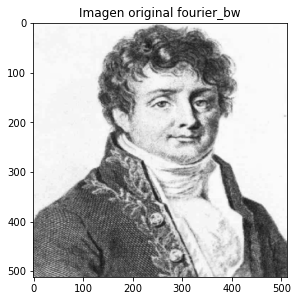

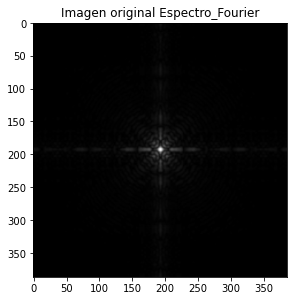

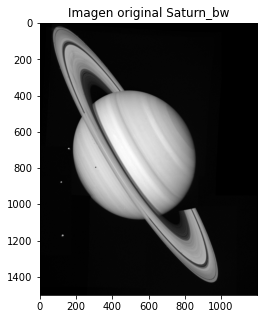

In [14]:
for img in imagenes:
    plot_img((img,imagenes[img]),'Imagen original')

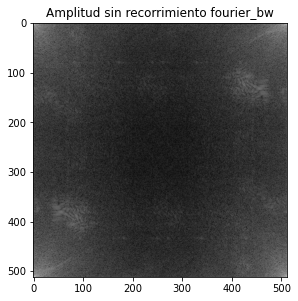

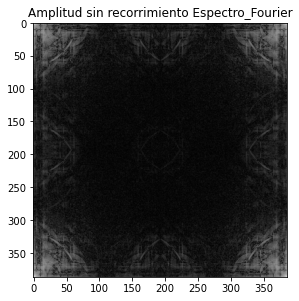

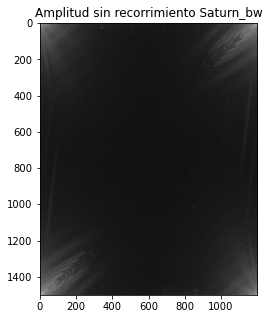

In [15]:
for img in imagenes:
    plot_img((img,amplitud_tf[img]),'Amplitud sin recorrimiento')

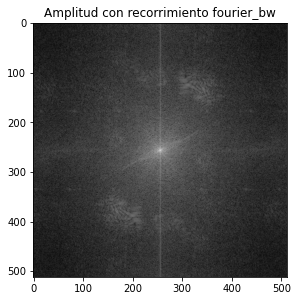

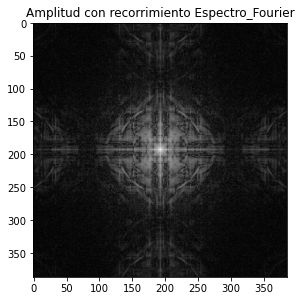

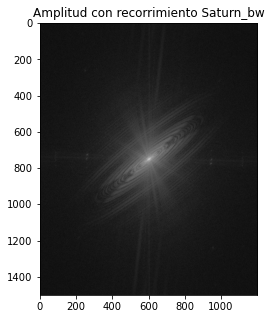

In [16]:
for img in imagenes:
    plot_img((img,amplitud_ctf[img]),'Amplitud con recorrimiento')

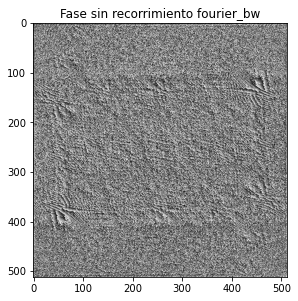

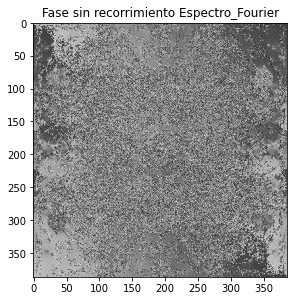

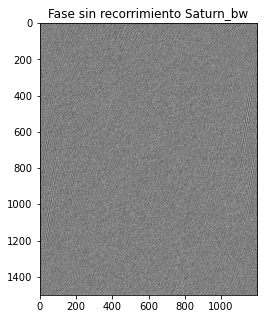

In [17]:
for img in imagenes:
    plot_img((img,fase_tf[img]),'Fase sin recorrimiento')

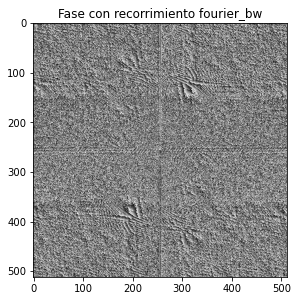

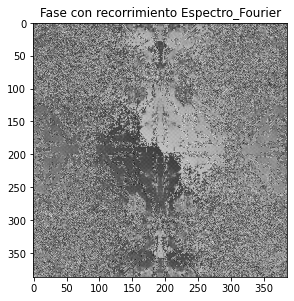

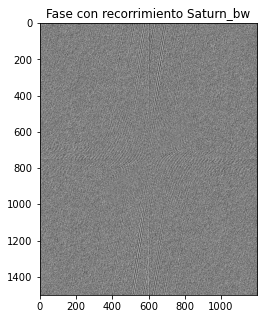

In [18]:
for img in imagenes:
    plot_img((img,fase_ctf[img]),'Fase con recorrimiento')

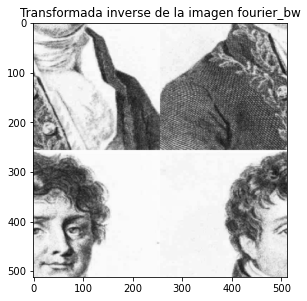

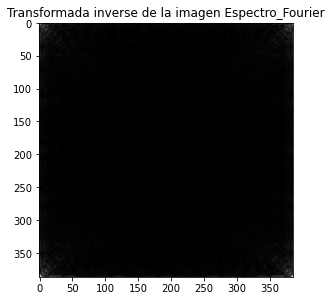

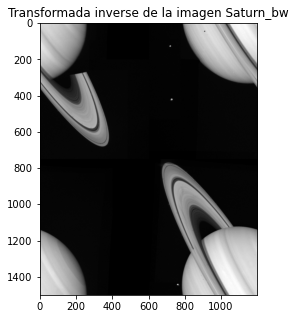

In [19]:
for img in imagenes:
    plot_img((img,inverse_tf_img[img]),'Transformada inverse de la imagen')

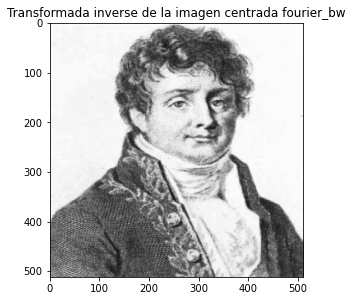

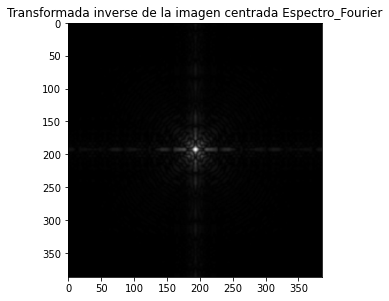

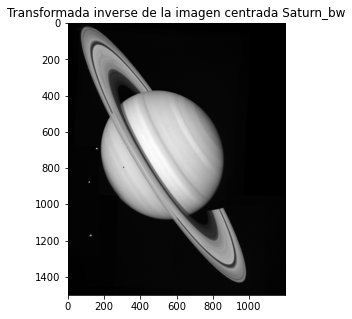

In [20]:
for img in imagenes:
    plot_img((img,inverse_ctf_img[img]),'Transformada inverse de la imagen centrada')

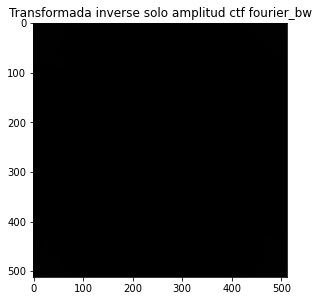

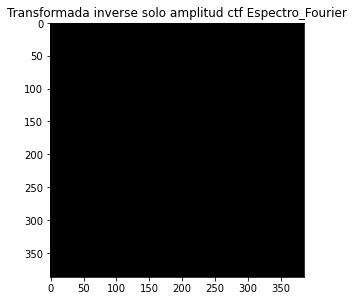

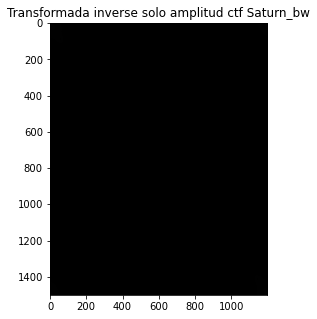

In [21]:
for img in imagenes:
    plot_img((img,inverse_amplitud_ctf[img]),'Transformada inverse solo amplitud ctf',1)

In [22]:
for img in imagenes:
    inverse_amplitud_ctf[img] = np.fft.fftshift(np.log1p(inverse_amplitud_ctf[img]) * 46)

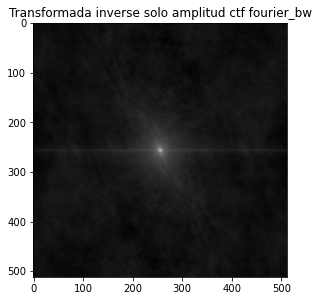

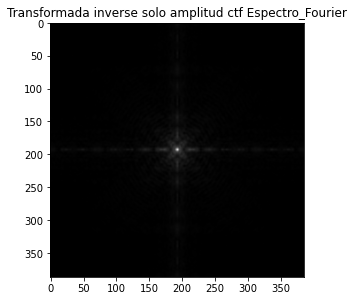

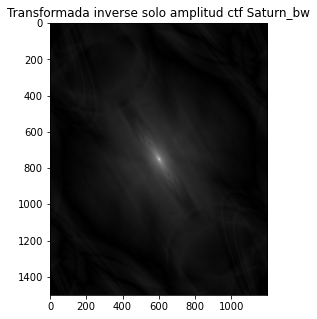

In [23]:
for img in imagenes:
    plot_img((img,inverse_amplitud_ctf[img]),'Transformada inverse solo amplitud ctf')

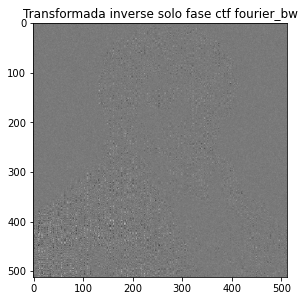

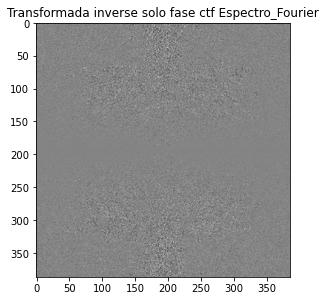

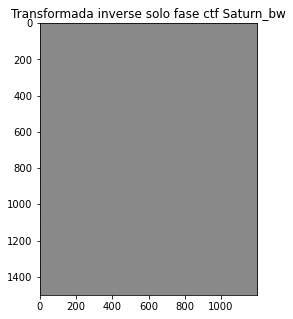

In [24]:
for img in imagenes:
    image = (inverse_fase_ctf[img]) 
    plot_img((img,image),'Transformada inverse solo fase ctf')

In [26]:
saveImg(amplitud_tf,'amplitud_sin_rec')
saveImg(fase_tf,'fase_sin_rec')
saveImg(amplitud_ctf,'amplitud_con_rec')
saveImg(fase_ctf,'fase_con_rec')
saveImg(inverse_ctf_img,'trans_inversa_completa')
saveImg(inverse_amplitud_ctf,'trans_inversa_amplitud')
saveImg(inverse_fase_ctf,'trans_inversa_fase')

In [ ]:
saveImg(inverse_tf_img,'trans_inversa_completa_sinR')
